#### About

> Imbalanced data

Imbalanced data in machine learning refers to a situation where the distribution of classes in the target variable is not equal, resulting in one or more classes being significantly underrepresented compared to others. This can cause problems in training a machine learning model, as the model may be biased towards the majority class, resulting in poor performance in the minority class. The main problems with unbalanced data in machine learning are:

Class Imbalance: There are few examples of the minority class, so it is difficult for the model to learn patterns from such limited data. 2. Majority Class Preference: Due to the uneven distribution of classes, the model may be biased towards the majority class, resulting in lower accuracy and expected performance for the minority class. 3. Misclassification cost: Compared to majority class misclassification, minority class misclassification may have a higher cost in some applications such as fraud detection or medical diagnostics. To address these issues, a variety of techniques can be used to handle unbalanced data, including:

1. Re-sampling technique: Oversampling the minority class or undersampling the majority class to balance the class distribution in the training data. 
2. Use a different evaluation metric. Precision may not be a good metric for unbalanced data, as it may be misleading. Instead, use metrics such as precision, recall, F1 score, and area under the receiver operating characteristic (ROC) curve.
3. Algorithmic techniques: Algorithms such as SMOTE (Synthetic Minority Oversampling Technique) generate synthetic samples of a minority class to increase its representation in the training data.
4. Ensemble methods: Ensemble methods, such as classification ensembles or boosting methods, can be used to improve the performance of models on unbalanced data.
5. Cost-sensitive learning. During model training, different misclassification costs are assigned to different classes to prevent the uneven distribution of classes and their misclassification costs.
6. Feature engineering: Creating informative feature or feature selection methods can help better represent the minority class and improve model performance.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


In [5]:
#Oversample the minority class (class 2) using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [6]:
# Undersample the majority class (class 0) using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)


In [7]:
# Train a Random Forest classifier on original data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [8]:
# Train a Random Forest classifier on SMOTE oversampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test)


In [9]:
# Train a Random Forest classifier on RandomUnderSampler undersampled data
rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_rus, y_train_rus)
y_pred_rf_rus = rf_rus.predict(X_test)


In [10]:
# Evaluate models using different metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')


In [11]:
accuracy_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_smote = precision_score(y_test, y_pred_rf_smote, average='weighted')
recall_smote = recall_score(y_test, y_pred_rf_smote, average='weighted')
f1_smote = f1_score(y_test, y_pred_rf_smote, average='weighted')
roc_auc_smote = roc_auc_score(y_test, rf_smote.predict_proba(X_test), multi_class='ovr')


In [12]:

accuracy_rus = accuracy_score(y_test, y_pred_rf_rus)
precision_rus = precision_score(y_test, y_pred_rf_rus, average='weighted')
recall_rus = recall_score(y_test, y_pred_rf_rus, average='weighted')
f1_rus = f1_score(y_test, y_pred_rf_rus, average='weighted')
roc_auc_rus = roc_auc_score(y_test, rf_rus.predict_proba(X_test), multi_class='ovr')


In [14]:
# Train an ensemble of classifiers (Random Forest, Logistic Regression, and Decision Tree)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('dt', dt)],
voting='soft')

In [15]:
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#Eva;iate enmsemble model using different metrics
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')
roc_auc_ensemble = roc_auc_score(y_test, ensemble.predict_proba(X_test), multi_class='ovr')

In [19]:
print("Original Data:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("\nSMOTE Oversampled Data:")
print("Accuracy: ", accuracy_smote)
print("Precision: ", precision_smote)
print("Recall: ", recall_smote)
print("F1-score: ", f1_smote)
print("ROC AUC: ", roc_auc_smote)
print("\nRandomUnderSampler Undersampled Data:")
print("Accuracy: ", accuracy_rus)
print("Precision: ", precision_rus)
print("Recall: ", recall_rus)
print("F1-score: ", f1_rus)
print("ROC AUC: ", roc_auc_rus)
print("\nEnsemble of Classifiers:")
print("Accuracy: ", accuracy_ensemble)
print("Precision: ", precision_ensemble)
print("Recall: ", recall_ensemble)
print("F1-score: ", f1_ensemble)
print("ROC AUC: ", roc_auc_ensemble)



Original Data:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
ROC AUC:  1.0

SMOTE Oversampled Data:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
ROC AUC:  1.0

RandomUnderSampler Undersampled Data:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
ROC AUC:  1.0

Ensemble of Classifiers:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
ROC AUC:  1.0


In [20]:
#plotting
import matplotlib.pyplot as plt

# Define colors for each technique
colors = ['blue', 'green', 'red', 'purple', 'orange']


In [21]:
accuracy_list = [accuracy, accuracy_smote, accuracy_rus, accuracy_ensemble]
precision_list = [precision, precision_smote, precision_rus, precision_ensemble]
recall_list = [recall, recall_smote, recall_rus, recall_ensemble]
f1_list = [f1, f1_smote, f1_rus, f1_ensemble]
roc_auc_list = [roc_auc, roc_auc_smote, roc_auc_rus, roc_auc_ensemble]


In [22]:
# Define technique labels
labels = ['Original Data', 'SMOTE Oversampled', 'RandomUnderSampler Undersampled', 'Ensemble of Classifiers']


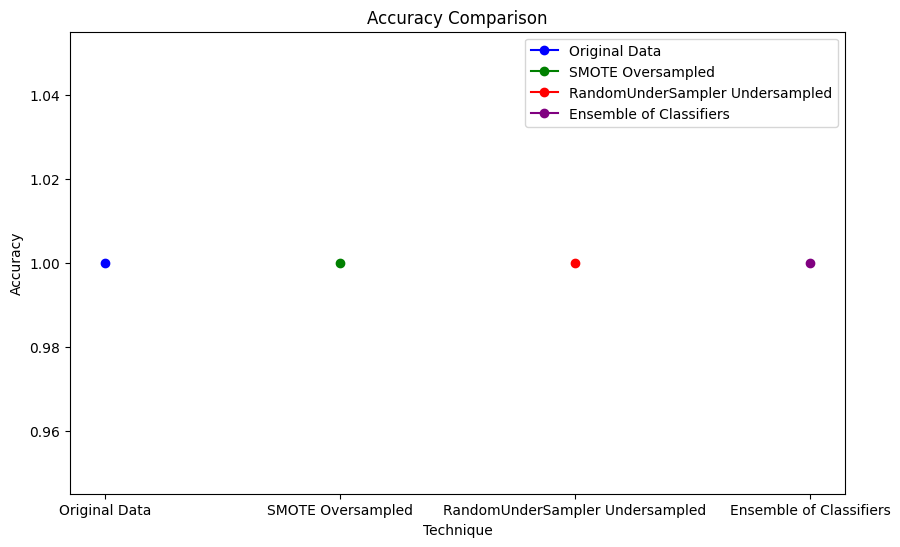

In [24]:
plt.figure(figsize=(10, 6))
for i in range(len(accuracy_list)):
    plt.plot(labels[i], accuracy_list[i], marker='o', color=colors[i], label=labels[i])

plt.xlabel('Technique')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')
plt.show()


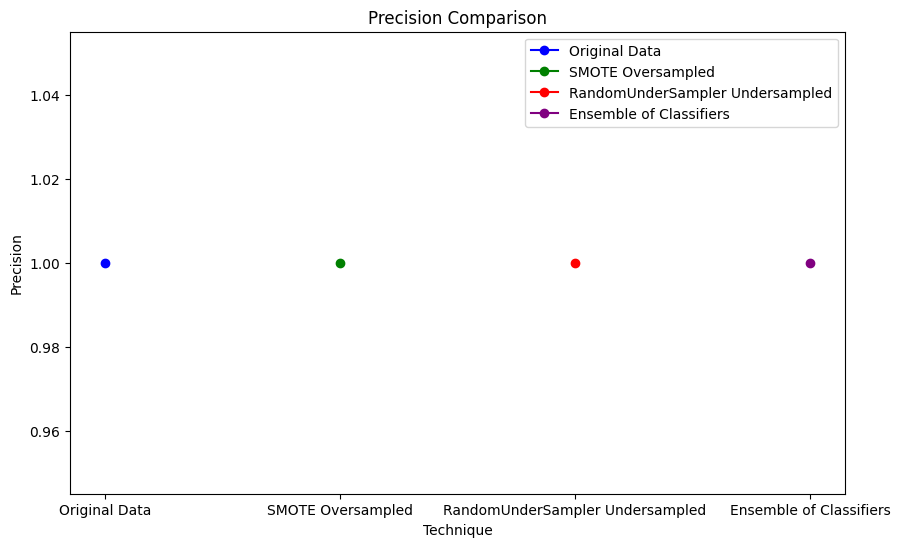

In [25]:
# Plot precision
plt.figure(figsize=(10, 6))
for i in range(len(precision_list)):
    plt.plot(labels[i], precision_list[i], marker='o', color=colors[i], label=labels[i])

plt.xlabel('Technique')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Comparison')
plt.show()

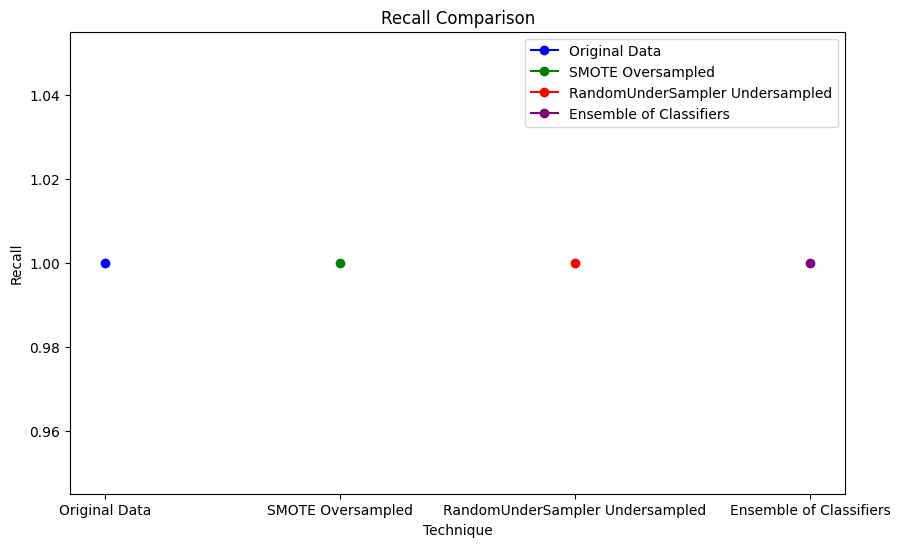

In [26]:
# Plot recall
plt.figure(figsize=(10, 6))
for i in range(len(recall_list)):
    plt.plot(labels[i], recall_list[i], marker='o', color=colors[i], label=labels[i])

plt.xlabel('Technique')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall Comparison')
plt.show()

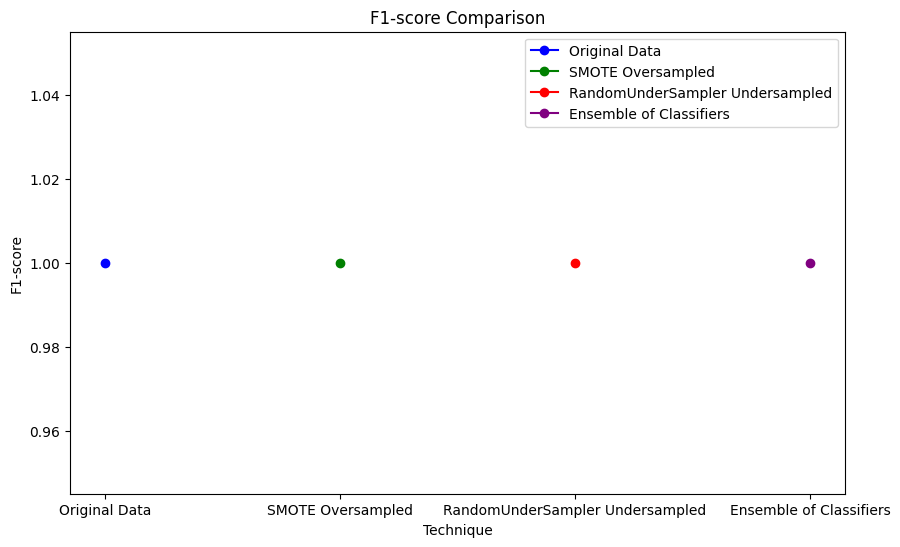

In [27]:
# Plot F1-score
plt.figure(figsize=(10, 6))
for i in range(len(f1_list)):
    plt.plot(labels[i], f1_list[i], marker='o', color=colors[i], label=labels[i])

plt.xlabel('Technique')
plt.ylabel('F1-score')
plt.legend()
plt.title('F1-score Comparison')
plt.show()


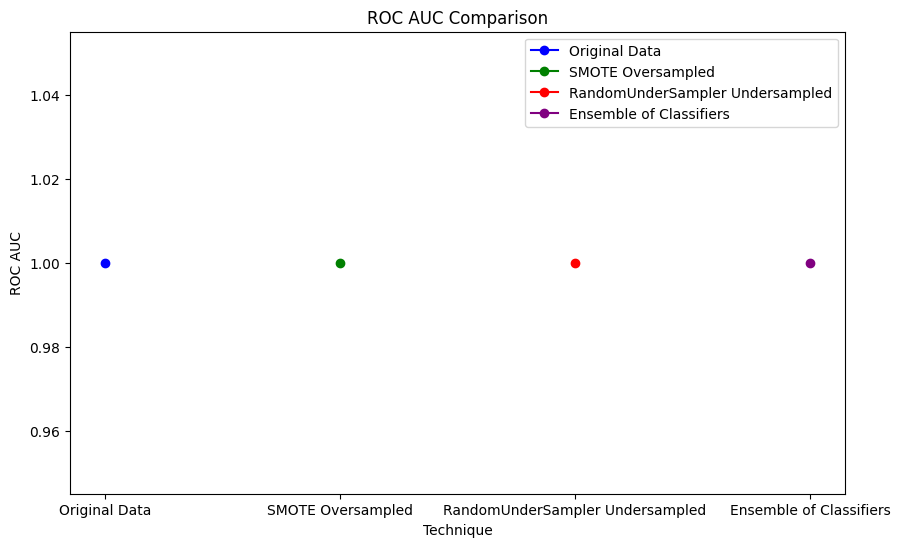

In [28]:
# Plot ROC AUC
plt.figure(figsize=(10, 6))
for i in range(len(roc_auc_list)):
    plt.plot(labels[i], roc_auc_list[i], marker='o', color=colors[i], label=labels[i])

plt.xlabel('Technique')
plt.ylabel('ROC AUC')
plt.legend()
plt.title('ROC AUC Comparison')
plt.show()